In [34]:
import numpy as np
import glob
import xarray as xr
import pandas as pd
tmax_path = '/g/data/oe9/project/team-drip/AWAP/AWAP_month_tmax.nc'
tmaxnc = xr.open_dataset(tmax_path)
# radnc = radnc.rename({'e0_avg':'pet'})
tmaxnc = tmaxnc.where(tmaxnc>=0, np.nan)
tmaxnc = tmaxnc.squeeze()
tmaxnc


<xarray.Dataset>
Dimensions:     (latitude: 270, longitude: 280, nv: 2, time: 696)
Coordinates:
  * latitude    (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude   (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 ...
  * time        (time) datetime64[ns] 1960-01-01 1960-02-01 1960-03-01 ...
Dimensions without coordinates: nv
Data variables:
    crs         (time) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    lat_bounds  (time, latitude, nv) float64 nan nan nan nan nan nan nan nan ...
    lon_bounds  (time, longitude, nv) float64 138.5 138.5 138.5 138.6 138.6 ...
    tmax_month  (time, latitude, longitude) float64 39.86 39.89 39.92 39.91 ...

In [35]:
mask_path = '/g/data/oe9/project/team-drip/MDB_MASK/MASK_ARRAY_AWAP.nc'
tmaxmask = xr.open_dataarray(mask_path)
tmaxmask
# tmaxnc = tmaxnc.where(tmaxmask, drop=True)
tmaxnc = tmaxnc.where(tmaxmask)
tmaxnc = tmaxnc.isel(time=range(481,684),latitude=range(0,263))
tmaxnc

<xarray.Dataset>
Dimensions:     (latitude: 263, longitude: 280, nv: 2, time: 203)
Coordinates:
  * latitude    (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude   (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 ...
  * time        (time) datetime64[ns] 2000-02-01 2000-03-01 2000-04-01 ...
Dimensions without coordinates: nv
Data variables:
    crs         (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    lat_bounds  (time, latitude, nv, longitude) float64 nan nan nan nan nan ...
    lon_bounds  (time, longitude, nv, latitude) float64 nan nan nan nan nan ...
    tmax_month  (time, latitude, longitude) float64 nan nan nan nan nan nan ...

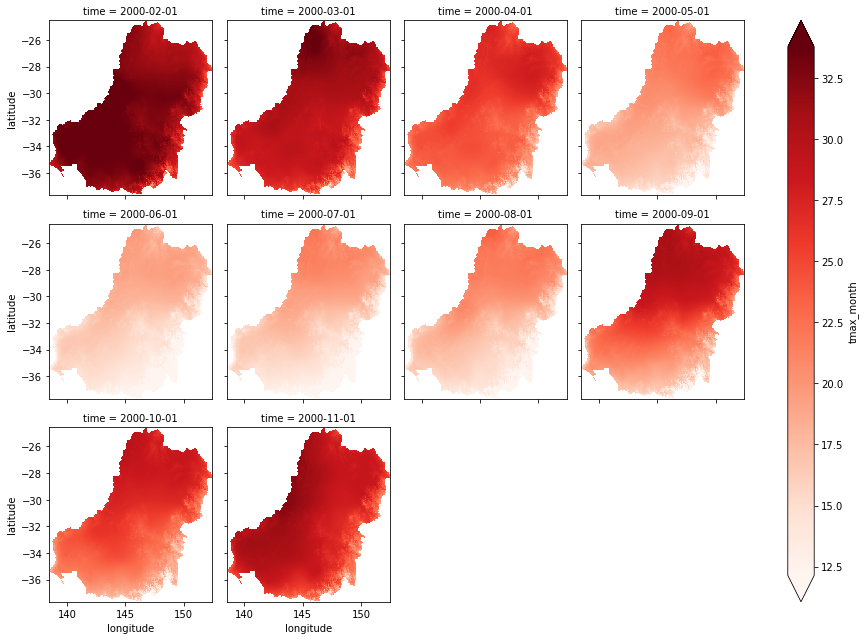

In [36]:
%matplotlib inline
tmaxnc.tmax_month.isel(time=range(0,10)).plot.imshow(col='time', robust = True, col_wrap=4, cmap = 'Reds')
tmaxnc = tmaxnc

In [37]:
outpath = '/g/data/oe9/project/team-drip/ENV_5km_month/Tmax_5km_month.nc'
tmaxnc.to_netcdf(outpath, mode = 'w')